# Daten importieren

In [1]:
import pandas as pd

df = pd.read_csv("house_renovation_data_rbf.csv")
df

,Total Area (SQFT),Price (USD),Renovated
0,3232,435171,False
1,3107,264908,False
2,2153,257839,True
3,1335,130703,True
4,1263,273898,True
...,...,...,...
193,652,358134,False
194,2238,272423,True
195,2964,311683,False
196,1106,492245,False


In [2]:
df.describe()

,Total Area (SQFT),Price (USD)
count,198.000000,198.000000
mean,1925.641414,284124.459596
std,815.172236,124140.305795
min,515.000000,22512.000000
25%,1234.250000,186412.250000
50%,1845.000000,284386.500000
75%,2568.500000,376572.000000
max,3458.000000,530239.000000


# Daten visualisieren

<Axes: xlabel='Total Area (SQFT)', ylabel='Price (USD)'>

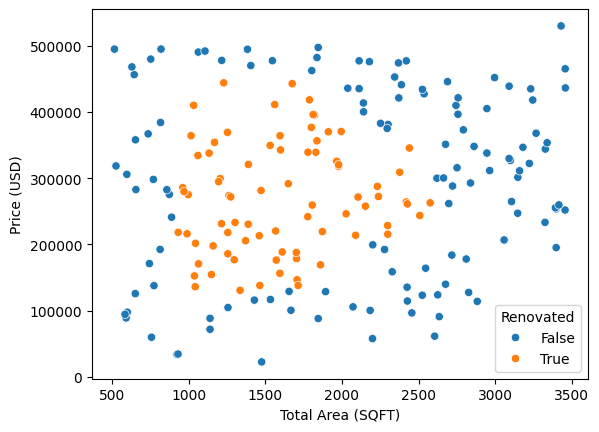

In [3]:
import seaborn as sns

sns.scatterplot(x=df["Total Area (SQFT)"], y=df["Price (USD)"], hue=df["Renovated"])

# Daten aufteilen

In [ ]:
X = df.copy()
y = X.pop("Renovated")

In [ ]:
X

,Total Area (SQFT),Price (USD)
0,3232,435171
1,3107,264908
2,2153,257839
3,1335,130703
4,1263,273898
...,...,...
193,652,358134
194,2238,272423
195,2964,311683
196,1106,492245


In [ ]:
y

0      False
1      False
2       True
3       True
4       True
       ...  
193    False
194     True
195    False
196    False
197     True
Name: Renovated, Length: 198, dtype: bool

In [ ]:
y.value_counts() / len(y)

False    0.606061
True     0.393939
Name: Renovated, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Daten skalieren

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Trainingsdaten visualisieren

<Axes: xlabel='Total Area (SQFT)', ylabel='Price (USD)'>

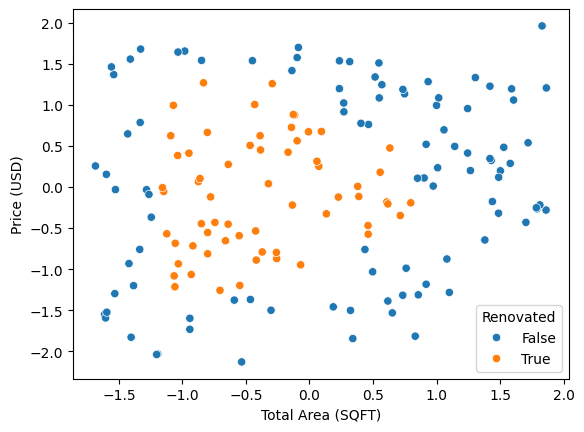

In [ ]:
import seaborn as sns

sns.scatterplot(x=X_train_scaled["Total Area (SQFT)"], y=X_train_scaled["Price (USD)"], hue=y_train)

# Beispielmodell trainieren

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", C=100, gamma=2)
model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=2)

# Support Vector Classifier - Entscheidungsgrenze visualisieren

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


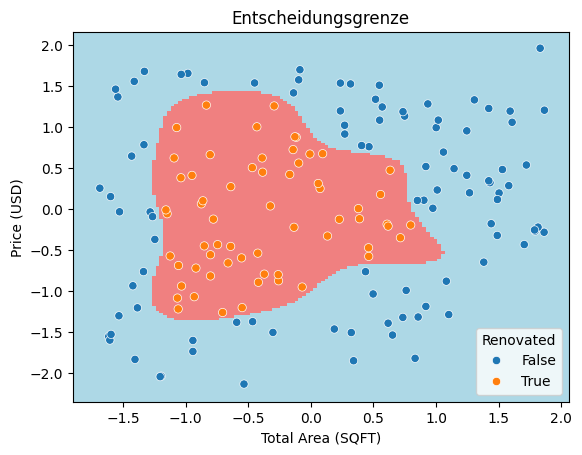

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(model, feature_1, feature_2, target):
    # Grenzen des Plots basierend auf den Merkmalen definieren
    x_min, x_max = feature_1.min() - 0.2, feature_1.max() + 0.2
    y_min, y_max = feature_2.min() - 0.2, feature_2.max() + 0.2

    # Ein Gitter von Punkten mit einem Abstand von 0.03 zwischen ihnen erstellen
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))

    # Vorhersagen für jeden Punkt im Gitter generieren und die Form der Ausgabe anpassen
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Hintergrund des Plots mit den Vorhersagen färben
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(["lightblue", "lightcoral"]))

    # Scatterplot der tatsächlichen Datenpunkte
    sns.scatterplot(x=feature_1, y=feature_2, hue=target)

    # Beschriftung der Achsen und Titel
    plt.xlabel(feature_1.name)
    plt.ylabel(feature_2.name)
    plt.title("Entscheidungsgrenze")

plot_decision_boundaries(model, X_train_scaled["Total Area (SQFT)"], X_train_scaled["Price (USD)"], y_train)

# Support Vector Classifier - Hyperparameteroptimierung


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 100, 200],
    "gamma": [0.01, 0.1, 1, 2, 3]
}

grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Accuracy: ", grid_search.best_score_)
print("Best Parameter: ", grid_search.best_params_)

Best Accuracy:  0.9620192307692308
Best Parameter:  {'C': 100, 'gamma': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


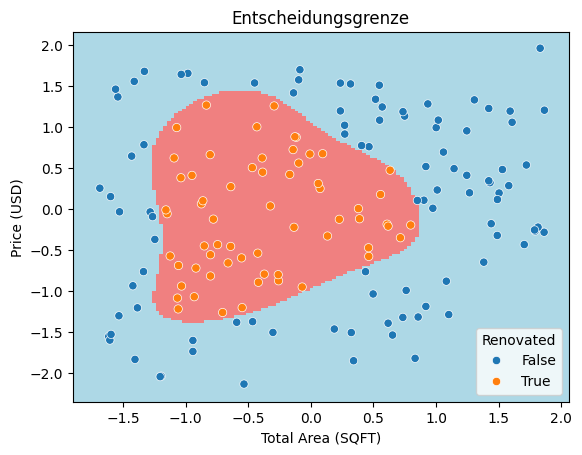

In [ ]:
final_model = grid_search.best_estimator_

plot_decision_boundaries(final_model, X_train_scaled["Total Area (SQFT)"], X_train_scaled["Price (USD)"], y_train)

# Finale Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_predict = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.95


# Confusion Matrix

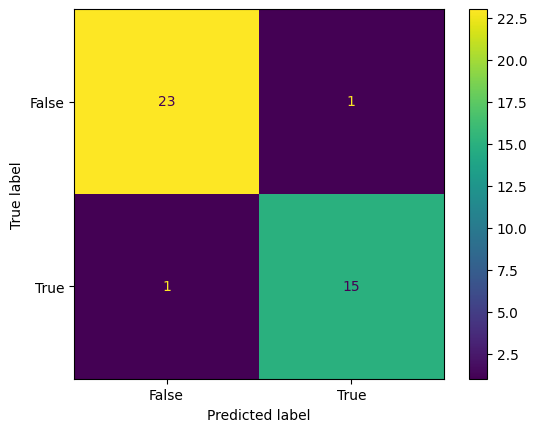

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


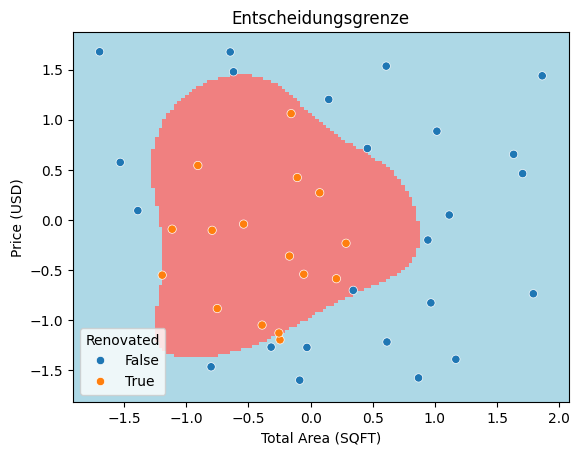

In [ ]:
plot_decision_boundaries(final_model, X_test_scaled["Total Area (SQFT)"], X_test_scaled["Price (USD)"], y_test)